##  Observable Trends 

~ Urban leads all "types" when it comes to fare, rides, and drivers.

~ Rural rides are less but fares seem to be counted at a higher rate.

~ Due to Urban leading in all categories, I'd advise the company to station more drivers in Urban areas.

In [2]:
%matplotlib inline

#Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
city = 'city_data.csv'
ride = 'ride_data.csv'

citydf = pd.read_csv(city)
ridedf = pd.read_csv(ride)

In [4]:
# merging both files
merge_df = pd.merge(ridedf ,citydf , how='outer', on='city', sort=False)
merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [5]:
merge_df.describe()

,fare,ride_id,driver_count
count,2375.000000,2.375000e+03,2375.000000
mean,26.753112,4.887270e+12,28.930105
std,12.109465,2.907361e+12,20.666306
min,4.050000,3.218337e+08,1.000000
25%,17.190000,2.381175e+12,11.000000
50%,26.600000,4.748541e+12,23.000000
75%,36.645000,7.461936e+12,45.000000
max,58.550000,9.991538e+12,73.000000


## Bubble Plot of Ride Sharing Data

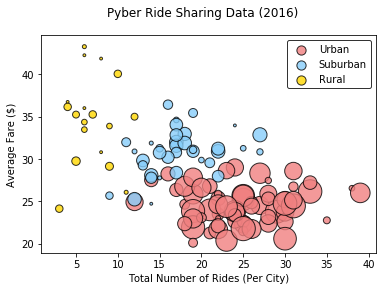

In [16]:
#city name
cityN = merge_df.groupby('city')

#driver count
driverC = cityN.mean()['driver_count']

#type of city
cityT = citydf.set_index('city')['type']

#fare average
avgF = cityN.mean()['fare']

#ride counts
rideC = cityN['ride_id'].count()

#making my dataframe
df = pd.DataFrame({"Number of Rides" : rideC, "Type of City" : cityT, 
                   "Average Fare" : avgF, "Number of Drivers" : driverC})


#sorting my dataframe by 'Number of Drivers'
df.sort_values('Number of Drivers', ascending = False)

#dataframes for each type
urban = df[df['Type of City'] == 'Urban']
suburban = df[df['Type of City'] == 'Suburban']
rural = df[df['Type of City'] == "Rural"]

#color import
colors = {'Light coral':'#F08080','Light sky blue':'#87CEFA','Gold':'#FFD700'}

#color for chart
colorDic = {'Urban' : colors['Light coral'], 'Suburban' : colors['Light sky blue'], 'Rural' : colors['Gold']}

#scatter plots
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*8, color = colorDic['Urban'], 
            edgecolor = 'black', label = 'Urban', alpha = 0.8)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*8, color = colorDic['Suburban'], 
            edgecolor = 'black', label = 'Suburban', alpha = 0.8)
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*8, color = colorDic['Rural'], 
            edgecolor = 'black', label = 'Rural', alpha = 0.8)

plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.suptitle('Pyber Ride Sharing Data (2016)')

lgnd = plt.legend( edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [85]
lgnd.legendHandles[1]._sizes = [85]
lgnd.legendHandles[2]._sizes = [85]

In [17]:
#using groupby for the each column
pieData = merge_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

## Total Fares by City Type

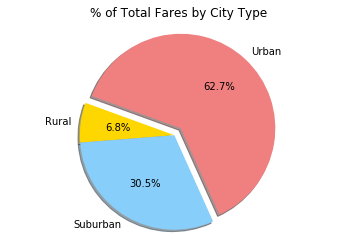

In [18]:
fareS = pieData.sum()['fare']

labels = fareS.index

pieColors = [colorDic[n] for n in labels]
explode = [0 , 0, .1]
plt.pie(fareS, startangle = 160, colors = pieColors, explode = explode, labels = labels,
       autopct = "%1.1f%%", shadow = True,) 
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

##  Total Rides by City Type

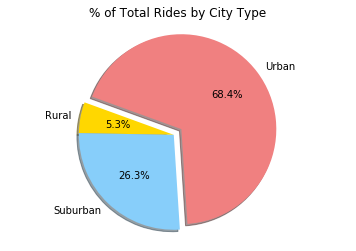

In [19]:
rideS = pieData.count()['ride_id']

labels = rideS.index

pieColors = [colorDic[n] for n in labels]
explode = [0 , 0, .1]
plt.pie(rideS, startangle = 160, colors = pieColors, explode = explode, labels = labels,
       autopct = "%1.1f%%", shadow = True,) 
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()

##  Total Drivers by City Type

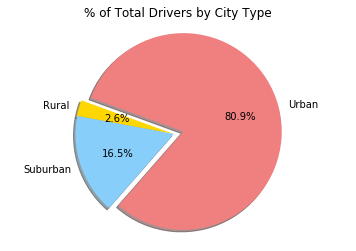

In [20]:
driverS = citydf.groupby('type').sum()['driver_count']

labels = driverS.index

pieColors = [colorDic[n] for n in labels]
explode = [0 , 0, .1]
plt.pie(driverS, startangle = 160, colors = pieColors, explode = explode, labels = labels,
       autopct = "%1.1f%%", shadow = True,) 
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()